<a href="https://colab.research.google.com/github/machio1985/deep-learning-with-keras-ja/blob/master/Deep_Learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%cd /content/drive/MyDrive

In [ ]:
#!git clone https://github.com/machio1985/deep-learning-with-keras-ja.git

In [56]:
%cd /content/drive/MyDrive/deep-learning-with-keras-ja

/content/drive/MyDrive/deep-learning-with-keras-ja


## ch1　基礎


### MNIST_CNN


In [ ]:
from __future__ import  print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [ ]:
np.random.seed(1671)

#network
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1 
NB_CLASSES = 10 
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [ ]:
#split
RESHAPED = 28*28
(X_train,y_train) , (X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0],'train samples')
print(X_test.shape[0] ,'test samples') 

#convert
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test  = np_utils.to_categorical(y_test,NB_CLASSES)

60000 train samples
10000 test samples


In [ ]:
#10 outputs
model = Sequential()
model.add(Dense(NB_CLASSES,input_shape = (RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#精度
import os 
from time import gmtime , strftime
from keras.callbacks import TensorBoard

def make_tensorboard(set_dir_name=''):
  tictoc = strftime("%a_%d_%Y_%H_%M_%S",gmtime())
  directory_name = tictoc
  log_dir = set_dir_name + '_' + directory_name
  os.mkdir(log_dir)
  tensorboard = TensorBoard(log_dir = log_dir)
  return tensorboard


In [ ]:
callbacks = [make_tensorboard(set_dir_name = 'keras_MNIST_V1')]
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

model.fit(X_train,y_train,
          batch_size = BATCH_SIZE , 
          epochs = NB_EPOCH , 
          callbacks = callbacks ,
          verbose = VERBOSE ,
          validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 12s 5ms/step - loss: 1.7405 - accuracy: 0.5017 - val_loss: 0.8820 - val_accuracy: 0.8317
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.8403 - accuracy: 0.8262 - val_loss: 0.6501 - val_accuracy: 0.8573
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6678 - accuracy: 0.8461 - val_loss: 0.5569 - val_accuracy: 0.8699
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5856 - accuracy: 0.8588 - val_loss: 0.5057 - val_accuracy: 0.8765
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5314 - accuracy: 0.8676 - val_loss: 0.4721 - val_accuracy: 0.8831
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.8717 - val_loss: 0.4483 - val_accuracy: 0.8872
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.8769 - val_loss: 0.4306 - val_accuracy: 0.891

In [ ]:
score = model.evaluate(X_test,y_test,verbose = VERBOSE)
print("TEST:",score[0])
print("TEST ACC:",score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2773 - accuracy: 0.9218
TEST: 0.27734461426734924
TEST ACC: 0.9218000173568726


In [ ]:
!python  /content/drive/MyDrive/Deep-Learning-with-Keras/Chapter01/keras_MINST_V1.py 

python3: can't open file '/content/drive/MyDrive/Deep-Learning-with-Keras/Chapter01/keras_MINST_V1.py': [Errno 2] No such file or directory


### 層を厚くすることによる精度向上
*  隠れ層を追加した。

In [ ]:
np.random.seed(1671)  # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________

### dropoutによる精度向上


60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)

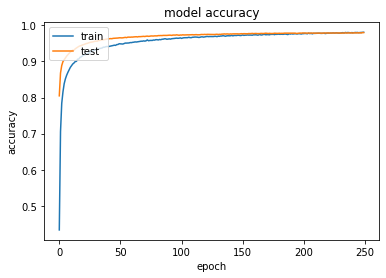

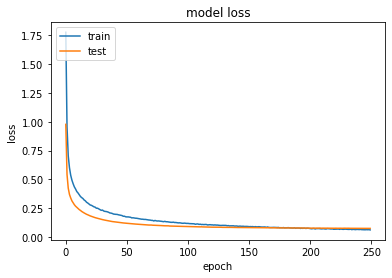

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

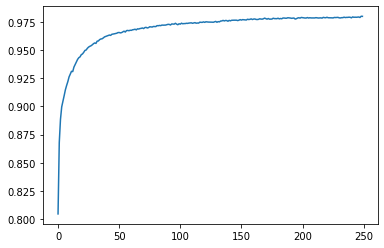

In [ ]:
plt.plot(history.history['val_accuracy'])

### RMSpropによる精度向上


60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)

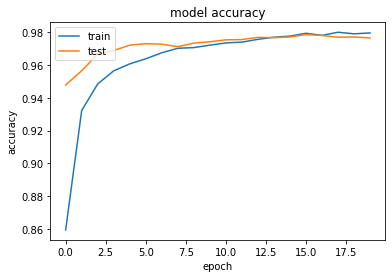

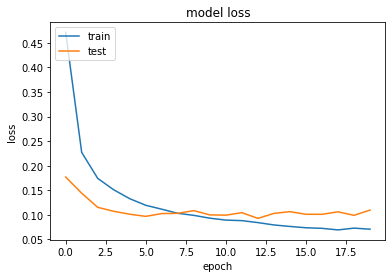

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = RMSprop() # optimizer, explainedin this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Adamによる改善

60000 train samples
10000 test samples
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense

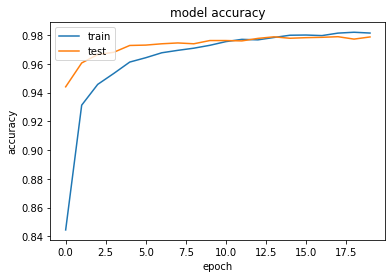

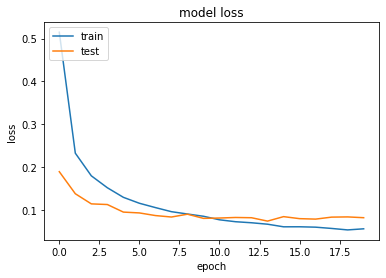

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explainedin this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ch2 Keras API

### モデルを作成する方法
* Sequential モデル
* functional API

### 事前定義済みのニューラルネットワーク層
* RNN:LSTM/GRU
* CNN/pooling
* 正則化:reqularizer/Dropout/バッチ正則化


### コールバック
* 学習中の結果保存やearly stoppingなどができる。
* TensorBoardではデータを保存し、可視化できる。

### ch3 CNN

### LeNetの実装
* エラーとなる。

In [ ]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

#define the convnet 


### CIFAR10

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_______________________________________________

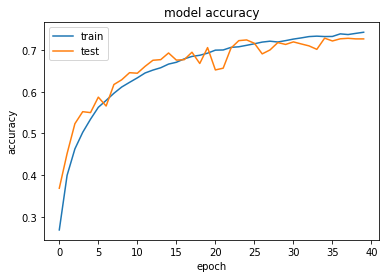

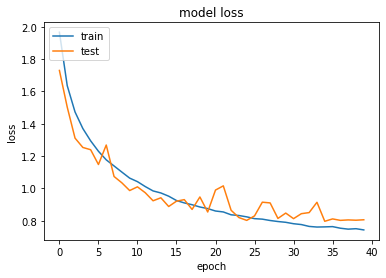

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator

#from quiver_engine import server

import matplotlib.pyplot as plt

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# train
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

#model.fit_generator(datagen.flow(X_train, Y_train,
#                        batch_size=BATCH_SIZE),
#                        samples_per_epoch=X_train.shape[0],
#                        nb_epoch=NB_EPOCH, 
#                        verbose=VERBOSE)

#server.launch(model)


print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Data Augmentetionによる改善
* 回転・拡大縮小・左右反転などによる学習データ増大


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

class Trainer():
  def __init__(self,model,loss,optimizer):
    self._target = model
    self._target.compile(loss = loss , optimizer =optimizer,metrics = ["accuracy"])
    self.verbose = 1
    self.log_dir = os.path.join(os.path.dirname(__file__),"logdir")
    self.model_file_name = "model_file.hdf5"

  def train(self,x_train,y_train,batch_size,epochs,validation_split):
    if os.path.exists(self.log.dir):
      import shutil
      shutil.rmtree(self.log_dir)
    os.mkdir(self.log_dir)

    datagen = ImageDataGenerator(
        featurewise_center = False ,
        samplewise_center = False ,
        featurewise_std_normalization = False ,
        samplewise_std_normalization = False ,
        zca_whitening = False ,
        rotation_range = False ,
        width_shift_range = False ,
        hight_shift_range = False ,
        horizontal_flip = False ,
        vertical_flip = False )
    
    datagen.fit(x_train)
    indices = np.arrange(x_train.shape[0])
    np.random.shuffle(indices)
    validation_size = int(x_train.shape[0]*validation_split)
    x_train,x_valid = x_train[indices[:-validation_size],:],x_train[indices[-validation_size:],:]
    y_train,y_valid = y_train[indices[:-validation_size],:],y_train[indices[-validation_size:],:]

    self._target.fit_generator(
        datagen.flow(x_train,y_train,batch_size = batch_size),
        steps_per_epoch = x_train.shape[0]//batch_size,
        epochs = epochs,
        validation_data = (x_valid , y_valid),
        callbacks = [TensorBoard(log_dir = self.log_dir),
                     ModelCheckpoint(os.path.join(self.log_dir,self.model_file_name),save_best_only = True)],
                     voebose = self.vorbose,
                     workers=4

    )

In [ ]:
import os
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten, Dropout
from keras.layers.core import Dense
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


def network(input_shape, num_classes):
    model = Sequential()

    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(32, kernel_size=3, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))
    return model


class CIFAR10Dataset():

    def __init__(self):
        self.image_shape = (32, 32, 3)
        self.num_classes = 10

    def get_batch(self):
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()

        x_train, x_test = [self.preprocess(d) for d in [x_train, x_test]]
        y_train, y_test = [self.preprocess(d, label_data=True) for d in
                           [y_train, y_test]]

        return x_train, y_train, x_test, y_test

    def preprocess(self, data, label_data=False):
        if label_data:
            # convert class vectors to binary class matrices
            data = np_utils.to_categorical(data, self.num_classes)
        else:
            data = data.astype("float32")
            data /= 255  # convert the value to 0~1 scale
            shape = (data.shape[0],) + self.image_shape  # add dataset length
            data = data.reshape(shape)

        return data


class Trainer():

    def __init__(self, model, loss, optimizer):
        self._target = model
        self._target.compile(
            loss=loss, optimizer=optimizer, metrics=["accuracy"]
            )
        self.verbose = 1
        logdir = "logdir_cifar10_deep_with_aug"
        self.log_dir = os.path.join("/content/drive/MyDrive/deep-learning-with-keras-ja", logdir)
        self.model_file_name = "model_file.hdf5"

    def train(self, x_train, y_train, batch_size, epochs, validation_split):
        if os.path.exists(self.log_dir):
            import shutil
            shutil.rmtree(self.log_dir)  # remove previous execution
        os.mkdir(self.log_dir)

        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (0~180)
            width_shift_range=0.1,  # randomly shift images horizontally
            height_shift_range=0.1,  # randomly shift images vertically
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

        # compute quantities for normalization (mean, std etc)
        datagen.fit(x_train)

        # split for validation data
        indices = np.arange(x_train.shape[0])
        np.random.shuffle(indices)
        validation_size = int(x_train.shape[0] * validation_split)
        x_train, x_valid = \
            x_train[indices[:-validation_size], :], \
            x_train[indices[-validation_size:], :]
        y_train, y_valid = \
            y_train[indices[:-validation_size], :], \
            y_train[indices[-validation_size:], :]

        model_path = os.path.join(self.log_dir, self.model_file_name)
        self._target.fit_generator(
            datagen.flow(x_train, y_train, batch_size=batch_size),
            steps_per_epoch=x_train.shape[0] // batch_size,
            epochs=epochs,
            validation_data=(x_valid, y_valid),
            callbacks=[
                TensorBoard(log_dir=self.log_dir),
                ModelCheckpoint(model_path, save_best_only=True)
            ],
            verbose=self.verbose,
            workers=4
        )


dataset = CIFAR10Dataset()

# make model
model = network(dataset.image_shape, dataset.num_classes)

# train the model
x_train, y_train, x_test, y_test = dataset.get_batch()
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop())
trainer.train(
    x_train, y_train, batch_size=128, epochs=15, validation_split=0.2
    )

# show result
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
312/312 [==============================] - 23s 69ms/step - loss: 2.0230 - accuracy: 0.2568 - val_loss: 1.5030 - val_accuracy: 0.4532
Epoch 2/15
312/312 [==============================] - 21s 67ms/step - loss: 1.5326 - accuracy: 0.4438 - val_loss: 1.2943 - val_accuracy: 0.5319
Epoch 3/15
312/312 [==============================] - 21s 66ms/step - loss: 1.3418 - accuracy: 0.5220 - val_loss: 1.0383 - val_accuracy: 0.6343
Epoch 4/15
312/312 [==============================] - 21s 67ms/step - loss: 1.2264 - accuracy: 0.5636 - val_loss: 1.1142 - val_accuracy: 0.6050
Epoch 5/15
312/312 [==============================] - 21s 67ms/step - loss: 1.1241 - accuracy: 0.6046 - val_loss: 1.0234 - val_accuracy: 0.6389
Epoch 6/15
312/312 [==============================] - 21s 66ms/step - loss: 1.0626 - accuracy: 0.6278 - val_loss: 0.8777 - val_accuracy: 0.6890
Epoch 7/15
312/312 [==============================] - 22s 69ms/step - loss: 1.0052 - accuracy: 0.6497 - val_loss: 0.8271 - val_accuracy:

In [ ]:
from pathlib import Path
import numpy as np
from PIL import Image
from keras.models import load_model

model_path = "logdir_cifar10_deep_with_aug/model_file.hdf5"
images_folder = "ch03/sample_images"

# load model
model = load_model(model_path)
image_shape = (32, 32, 3)

# load images
def crop_resize(image_path):
    image = Image.open(image_path)
    length = min(image.size)
    crop = image.crop((0, 0, length, length))
    resized = crop.resize(image_shape[:2])  # use width x height
    img = np.array(resized).astype("float32")
    img /= 255
    return img


folder = Path(images_folder)
image_paths = [str(f) for f in folder.glob("*.png")]
images = [crop_resize(p) for p in image_paths]
images = np.asarray(images)


In [ ]:
predicted = model.predict_classes(images)

assert predicted[0] == 3, "image should be cat."
assert predicted[1] == 5, "image should be dog."

print("You can detect cat & dog!")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


You can detect cat & dog!


### 組み込みのVGG16モデルを使用して特徴量抽出期として活用する。

In [ ]:
#pretrain_vgg.py
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras.preprocessing.image as Image
import numpy as np


model = VGG16(weights="imagenet", include_top=True)

image_path = "ch03/sample_images_pretrain/steaming_train.png"
image = Image.load_img(image_path, target_size=(224, 224))  # imagenet size
x = Image.img_to_array(image)
x = np.expand_dims(x, axis=0)  # add batch size dim
x = preprocess_input(x)

result = model.predict(x)
result = decode_predictions(result, top=3)[0]
print(result[0][1])  # show description


49152/35363 [=========================================] - 0s 0us/step
steam_locomotive


In [ ]:
#pretrain_vgg_feature_extract.py
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights="imagenet")
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer("block4_pool").output)

img_path = "ch03/sample_images_pretrain/elephant.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)